In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sn


/home/bears_bears/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/bears_bears/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


array([[<Axes: title={'center': 'ydiffs'}>,
        <Axes: title={'center': 'heights'}>],
       [<Axes: title={'center': 'distances'}>,
        <Axes: title={'center': 'angles'}>]], dtype=object)

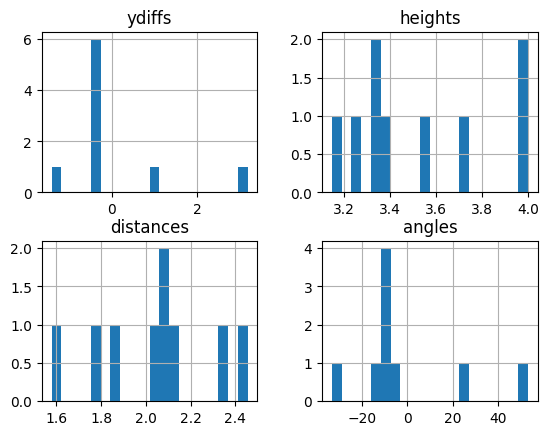

In [2]:
path = "../Tracks/-1/40.csv"
header = ["ydiffs","heights","distances","angles"]
df = pd.read_csv(path, sep=";", decimal=",", names=header, skiprows=[0])
df.hist(bins=20)

In [3]:
path1 = r"../Tracks/1/40.csv"
pd.read_csv(path1, sep=";", decimal=",", names=header, skiprows=[0]).describe()

,ydiffs,heights,distances,angles
count,9.000000,9.000000,9.000000,9.000000
mean,0.466221,3.442490,2.002251,10.987356
std,1.150814,0.252212,0.341856,27.322872
min,-1.527718,3.011518,1.412685,-38.822430
25%,-0.067925,3.230669,1.898575,-2.427993
50%,0.688724,3.457031,1.995255,16.380460
75%,0.875873,3.632219,2.317723,27.662560
max,2.335221,3.727909,2.432742,49.488820


In [4]:
"1.5".replace("a", ",")

'1.5'

In [5]:
def aux_to_df(aux):
    """
    Load the tracks data into a dataframe for one aux. input
    NB : Comma is used for the decimals
    """
    aux = str(aux).replace(".", ",")
    files = glob.glob(os.path.join(f"../Tracks/{aux}", "*.csv"))

    df  = pd.concat((pd.read_csv(f, sep=";", decimal=",", names=header, skiprows=[0]) for f in files),
                   ignore_index=True)
    return df 

In [6]:
# Loads the Data
df1 = aux_to_df(1)
dfm1 = aux_to_df(-1)

# auxiliary inputs
auxs = [-5, -2, -1, -0.5, 0, 0.5, 1, 2, 5]
# dictionary of dataframes of each aux input
dfs = dict(zip(auxs, [aux_to_df(i) for i in auxs])) 

In [7]:
dfs[2]

,ydiffs,heights,distances,angles
0,-1.428168,4.000000,1.630203,-41.22054
1,-0.967325,3.255836,2.261555,-23.15763
2,-1.283298,3.703522,2.480588,-27.35416
3,-1.162634,3.377879,1.807776,-32.74627
4,-1.187579,3.974785,1.950029,-31.34166
...,...,...,...,...
445,-1.238746,3.604105,1.983478,-31.98611
446,-1.001022,3.417442,2.729853,-20.13772
447,-0.926007,3.676545,2.826065,-18.14224
448,-0.851729,3.442509,2.250841,-20.72689


# Plots

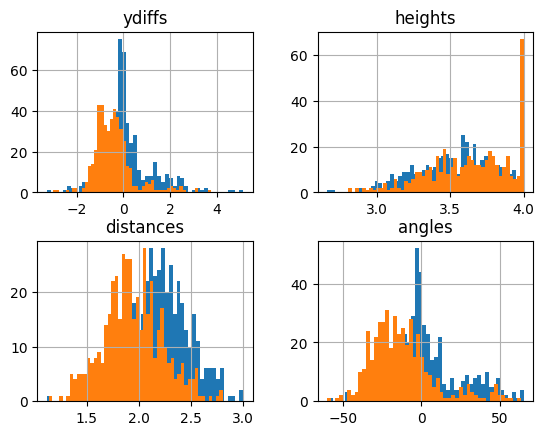

In [8]:
# Plot hist
ax = df1.hist(bins=50, label=1)
ax = dfm1.hist(bins=50, ax=ax, label=-1)

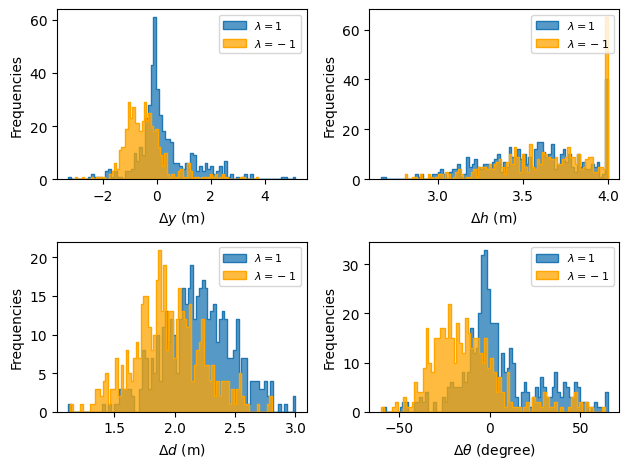

In [9]:
plt.Figure(figsize=(50, 50))
labels = [r"$\Delta y$ (m)", r"$\Delta h$ (m)", r"$\Delta d$ (m)", r"$\Delta \theta$ (degree)"]
common_params = {
    "element":"step",
    "bins":80}
for i,col in enumerate(df1.columns):
    ax_col = plt.subplot(2,2,i+1)
    sn.histplot(dfs[1][col], ax=ax_col,**common_params)
    sn.histplot(dfs[-1][col], ax=ax_col, color='orange', **common_params)
#     sn.histplot(dfs[0][col], ax=ax_col, color='darkgreen', alpha=.4, element="step", bins=80)
#     ax_col.legend([f"$\lambda={1}$", f"$\lambda={-1}$"])
    ax_col.set_xlabel(labels[i])
    ax_col.set_ylabel("Frequencies")
    ax_col.legend([f"$\lambda={1}$", f"$\lambda={-1}$"], loc='best', fontsize=8)
# ax_col.legend(bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("images/Curr42d_env_distribution.pdf", dpi=70)

In [16]:
# pd.DataFrame(dfs["1"].median()).transpose().index
med_df = pd.DataFrame({lam:dfs[lam].median() for lam in auxs}).transpose()
med_df.index.name = r"$\lambda$"
med_df.index = med_df.index.format(":.1f")[1:]
print(med_df.to_latex(float_format="%.3f"))


\begin{tabular}{lrrrr}
\toprule
 & ydiffs & heights & distances & angles \\
\midrule
-5.0 & -0.344 & 3.795 & 1.743 & -10.907 \\
-2.0 & -0.463 & 3.671 & 1.887 & -13.329 \\
-1.0 & -0.536 & 3.654 & 1.924 & -15.854 \\
-0.5 & -0.137 & 3.621 & 1.995 & -4.323 \\
 0.0 & 0.172 & 3.579 & 2.061 & 4.470 \\
 0.5 & -0.121 & 3.569 & 2.120 & -3.347 \\
 1.0 & -0.001 & 3.579 & 2.195 & -0.042 \\
 2.0 & -0.073 & 3.564 & 2.422 & -1.757 \\
 5.0 & 0.353 & 3.761 & 3.000 & 6.747 \\
\bottomrule
\end{tabular}



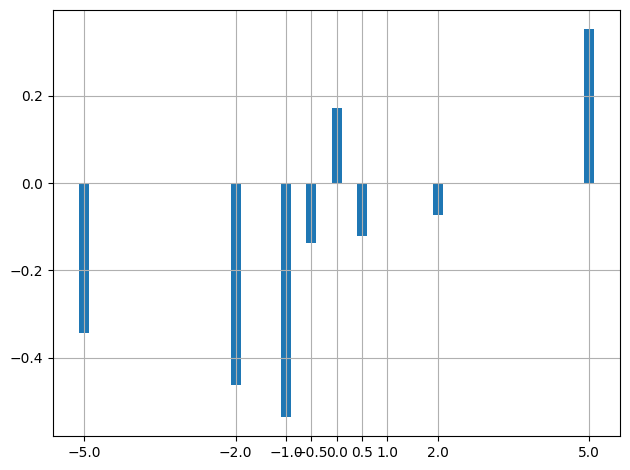

In [17]:
plt.bar(auxs, med_df["ydiffs"], width=.2)
plt.grid()
plt.xticks(auxs)
plt.tight_layout()